# 분류 및 군집 분석

병아리가 무럭무럭 자라고 있을 무렵, 김 대표는 병아리 감별사에게 암수 구별을 요청했습니다. 하지만 병아리 감별사의 시급이 너무 높아 전체 병아리의 암수 구별을 맡길 순 없었고, 제한된 예산 내에서 어렵사리 60마리만 암수를 구분할 수 있었습니다. 나머지 병아리들의 암수는 곁눈질로 배운 김 대표가 직접 구별해 보려고 하는데, 과연 김 대표는 그 어렵다는 병아리의 암수를 구분해 낼 수 있을까요?

회귀 분석은 독립 변수 (x)와 종속 변수 (y)가 모두 연속형 변수일 때 사용할 수 있는 분석 방법이었습니다. 하지만 종속 변수가 연속형 (continuous)이 아니라 범주형 (categorical)일 경우는 어떻게 해야 할까요? 학습을 기반으로 한 분류 (classification) 방법과 학습을 하지 않고 그룹을 지을 수 있는 군집 (clustering) 방법에 대해서 알아보도록 하겠습니다.

1. 로지스틱 회귀 - 병아리의 성별을 구분할 수 있을까?

시그모이드 함수 이용, 수식으로 모델을 표현 가능한 분류
사건의 발생 가능성(확률)을 예측

In [1]:
import pandas as pd
g = pd.read_csv('ch6-1.csv')
g.head()

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


In [2]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


총 3개의 열(변수)과 60개의 행으로 구성. 첫 번째 열과 두 번째 열은 숫자, 세 번째 열은 성별을 나타내는 문자로 구성된 데이터프레임

gender 열의 경우 값이 문자로 들어있어 로지스틱 회귀 모델 적용 시 에러가 발생하기 때문에 미리 m을 1로, f를 0으로 변경. 

map() 메소드를 이용합니다.

- 로지스틱 회귀는 0또는 1로만 구분하기때문 m을 1로, f를 0으로 변경. 

In [3]:
# gender 변수를 숫자로 변환
# .map -> 문자열을 숫자로 매핑
g['gender'] = g['gender'].map({'m': 1, 'f': 0})
g.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


## 1-3 로지스틱 회귀 분석

로지스틱 회귀 분석은 `statsmodels` 패키지의 `Logit.from_formula()` 함수를 사용합니다. 해당 함수 사용법은 R 언어에서 로지스틱 회귀를 실행할 수 있는 `glm()` 함수와 거의 유사합니다. 수식 형태는 `Logit.from_formula(y ~ x1 + x2, data=데이터셋이름)`입니다. 병아리 성별(`gender`)을 y로 두고, 날개 길이(`wing_length`)와 꽁지 깃 길이(`tail_length`)를 각각 독립 변수 x1, x2로 설정해 로지스틱 회귀 모델을 만들어 `model_glm`이라는 변수로 지정하고, `fit()` 메소드를 이용해 모델을 학습시킵니다. 로지스틱 회귀 모델의 결과는 일반 회귀 분석과 동일하게 `summary()` 메소드를 통해 확인할 수 있습니다.

In [4]:
# 로지스틱 회귀 구현을 위한 모듈 불러오기
import statsmodels.api as sm
# 모델 구축 및 학습
model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data=g).fit()
model_glm.summary()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.8020
Time:                        11:43:59   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.1955     23.410      2.999      0.003      24.313     116.078
wing_length    -1.0531      0.505     -2.087      0.037      -2.042      -0.064
tail_length    -2.3859      0.969     -2.462      0.014      -4.285      -0.486
===============================================================================
"""

날개 길이(wing_length)와 꽁지 길이(tail_length) 두 변수 모두 p값이 각각 0.037, 0.014로 0.05보다 작기 때문에 유의 수준 5% 하에서 통계적으로 유의합니다.

1. p-value (P>|z|) 값이 세개 모두 0.05보다 작은값

-> 유의미한 결과

2. R-squared 값이 없네? -> 새로운 분류 지표가 필요하다는 뜻

그전에 분류가 어떻게 되는지 확인

데이터를 시각화 하여 분류된 결과를 그래프로 그려봅니다.

C:\Users\HKIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


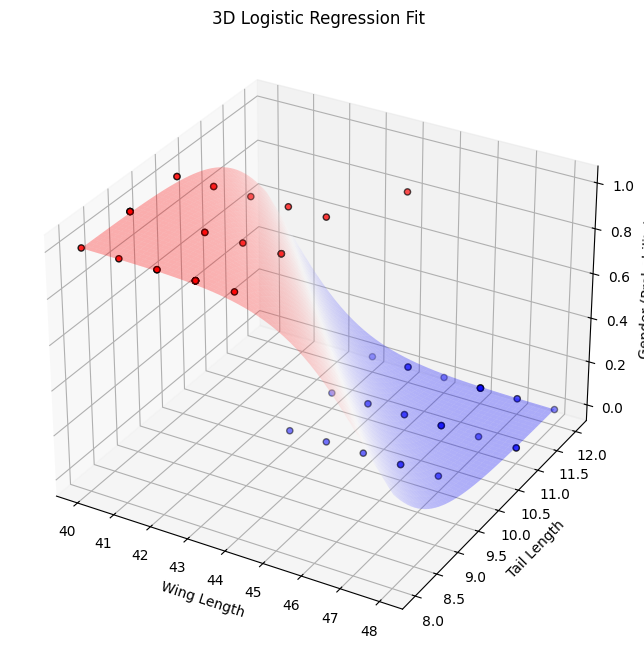

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

# 모델 학습
X = g[['wing_length', 'tail_length']]
y = g['gender']
model = LogisticRegression()
model.fit(X, y)

# 예측 확률 계산
xx, yy = np.meshgrid(np.linspace(X['wing_length'].min(), X['wing_length'].max(), 50),
                     np.linspace(X['tail_length'].min(), X['tail_length'].max(), 50))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트
sc = ax.scatter(X['wing_length'], X['tail_length'], y, c=y, cmap='bwr', edgecolor='k')

# 시그모이드 함수
ax.plot_surface(xx, yy, Z, alpha=0.3, cmap='bwr')

# 축 설정
ax.set_xlabel('Wing Length')
ax.set_ylabel('Tail Length')
ax.set_zlabel('Gender (Probability)')
ax.set_title('3D Logistic Regression Fit')

plt.show()

## 분류 알고리즘의 성능 평가 방법

분류 알고리즘의 경우 일반적으로 정오 분류표(Confusion Matrix)와 ROC 커브(Receiver Operating Characteristic Curve)의 밑 부분 넓이인 AUC(Area Under the ROC Curve)를 이용해서 성능을 평가합니다.

### 정오 분류표

정오 분류표(Confusion Matrix)는 실제 값과 예측 값이 얼마나 잘 맞아떨어졌는지를 표로 나타낸 것입니다. 수치형 데이터와 달리 범주형 데이터의 경우 실제 값과 예측 값이 같은지 다른지를 진리 값(True or False)으로 표현할 수 있기 때문에 이런 방법을 사용합니다.

<img src="4.png" width="1080" height="500">

의사 A는 의사 B보다 췌장암 진단 정확도가 0.6% 낮습니다. 하지만 민감도는 100%로 췌장암에 걸린 모든 환자들을 정확히 진단해 냈습니다. 물론, 10명 정도는 정상이었지만 췌장암이라고 오진하기도 했습니다.

의사 B는 정상인들을 정상이라고 판단한 특이도가 의사 A보다 0.8% 더 높습니다. 하지만 췌장암에 걸린 환자 10명 중 2명을 정상이라고 오진했습니다.

이와 같은 경우라면 정확도가 낮더라도 본인의 목숨을 위해서 의사 A에게 진단을 받아야 할 것입니다. 이렇게 잘못 진단(예측)해서 손실이 막대한 경우에는 정확도보다 민감도를 더 중요한 지표로 사용합니다.

보수적으로 접근할때 민감도도 좋은 지표임! 암 아니라고 진단받았는데 암인것보다 낫지

<img src="5.png" width="1080" height="250">

로지스틱 회귀 모델의 성능 평가

앞서 설명한 분류 알고리즘의 성능 평가 방법을 이미 분석했던 병아리 암수 구분 로지스틱 회귀 모델에 적용해 보겠습니다. 

그 전에 model_glm의 predict 메소드를 이용해 예측 값을 생성하고, head() 메소드를 이용해 확인해 보겠습니다.

In [7]:
# predict() 메소드를 이용해 예측 값(확률) 생성
y_prob = model_glm.predict(g.iloc[:, 0:2])
# g.iloc[:,0:2], wing_length, tail_length
# 위의 값을 입력으로 넣어서, 결과 예측
# 예측 값(확률) 확인
y_prob.head()

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

dtype: float64
​
이 결과를 보면 일반 회귀 분석과 달리 종속 변수(y)가 확률 값으로 나온 것을 확인할 수 있습니다. 첫 번째 값은 0.916 정도로 1에 매우 가까운 값입니다. 이 말은 첫 번째 병아리가 수컷(m, male)일 확률이 약 91.6%라는 뜻입니다. 이 정도 확률이라면 첫 번째 병아리는 수컷이라고 판정해도 될 듯합니다.
그렇다면 수컷으로 판정할 수 있는 최소 확률 값은 얼마일까요? 수컷, 암컷(female) 두 가지 결과 밖에 없기 때문에 50% 확률을 기준으로 암수 구분의 기준 값을 설정하면 됩니다. 즉, 반올림만 실시하면 0 또는 1로 변환할 수 있습니다. 그리고 이후에 confusion_matrix() 함수를 이용하기 위해 데이터 타입을 list로 미리 변경하겠습니다.

In [13]:
# 예측 값(확률)을 반올림을 통해 1과 0으로 표현한 뒤 list 타입으로 변경
y_pred = list(map(round, y_prob))
# 예측 값(클래스) 확인
y_pred[0:5]



[1, 1, 1, 1, 1]

In [14]:
# 기준 값인 gender 열을 별도 y로 저장
y = g['gender']

정오 분류표

In [15]:
# 정오 분류표 함수 불러오기
from sklearn.metrics import confusion_matrix
# 분류 결과 평가, 1을 기준으로
# y는 실제값, y_pred는 예측값
confusion_matrix(y, y_pred, labels=[1, 0])



array([[28,  2],
       [ 1, 29]], dtype=int64)

정오 분류표를 보니 한 눈에 봐도 정확도(Accuracy)가 높아 보입니다. 하지만 정확한 값은 계산을 해봐야 합니다. 

게다가 민감도(Sensitivity, Recall)와 정밀도(Precision) 또한 계산을 해야 합니다. 

이런 번거로움은 classification_report(실제 값, 예측 값) 함수를 이용해 해소할 수 있습니다.

In [16]:
# 분류 리포트 함수 불러오기
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



병아리의 날개 길이(wing_length), 꽁지 길이(tail_length) 데이터를 이용해 만든 로지스틱 회귀 모델의 성능은 매우 우수합니다. 

정확도가 95%, 1을 기준으로 민감도가 93%, 정밀도가 97%로 병아리의 암수 구분을 훌륭하게 해냈습니다.

이제 추가로 ROC 커브를 그려보고, AUC 값도 확인해 보겠습니다. ROC 커브를 그리기 위해서 sklearn.metrics모듈에서 roc_curve() 함수를 불러옵니다. 

함수 사용법은 roc_curve(실제 값, 예측 확률 값)으로 fpr, tpr, thresholds를 구해서 이를 이용해 ROC 커브를 그립니다.

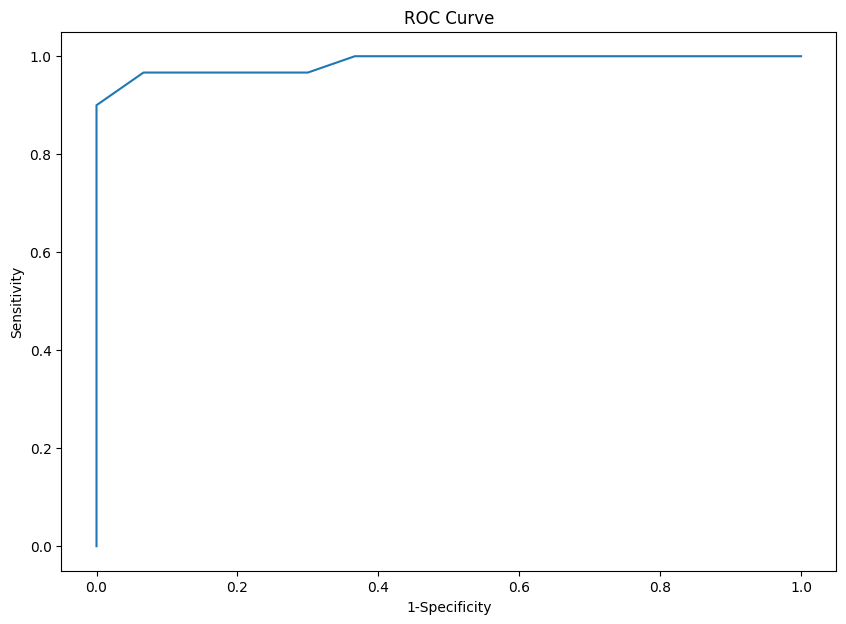

In [17]:
# ROC 커브를 그리기 위한 함수 불러오기
from sklearn.metrics import roc_curve
# ROC 커브를 그리기 위한 변수 설정
fpr, tpr, thresholds = roc_curve(y, y_prob)
# ROC 커브 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

ROC 커브가 좌측 상단에 꽉 찬 형태로 모델의 성능이 매우 뛰어난 것으로 보입니다. 

auc() 함수를 불러와 AUC를 계산해 보겠습니다.

In [18]:
# AUC 계산을 위한 함수 불러오기
from sklearn.metrics import auc
# AUC 계산
auc(fpr, tpr)


0.9866666666666667

ROC 커브의 아래 면적인 AUC 값이 0.987로 1에 가까운 매우 높은 값이 나왔습니다. 

병아리 암수 구분 로지스틱 회귀 모델의 성능은 매우 뛰어나다고 평가할 수 있습니다.

2. 분류 알고리즘 - 병아리의 품종을 구분할 수 있을까?

분석스토리
무럭무럭 잘 자라고 있는 병아리들을 관찰하던 어느 날, 김 대표는 뭔가 특이한 점을 발견했습니다. 병아리가 성장함에 따라 생김새가 변하겠지만, 병아리들마다 날개 길이, 꽁지 길이, 볏의 높이가 유난히 차이가 나 보였습니다. 불안한 마음에 사진을 찍어 종란 판매 업체 담당자에게 이 병아리들이 같은 품종이 맞는지 문의했습니다. 그리고 담당자에게서 온 답변은 김 대표를 매우 혼란스럽게 만들었습니다. 종란 판매 직원의 실수로 주문을 넣었던 A 품종의 종란뿐만 아니라 B와 C라는 2가지 품종의 종란이 섞여서 납품되었다는 것입니다. 졸지에 3가지 품종의 병아리를 키우게 된 김 대표는 판매처에 클레임(claim)을 제기했고, 종란 판매처의 품종 엔지니어가 김 대표의 양계 농장에 급파되었습니다. 엔지니어는 하루 동안 총 300마리의 병아리 품종을 정확히 구분해 기록했습니다. 김 대표는 다음에도 혹시나 이런 일이 발생할지 모른다는 불안감에 이 300마리의 병아리 데이터를 활용해 품종을 구분할 수 있는 분류 모델을 개발해보려고 합니다. 과연 그는 암수를 구분했던 것처럼 품종도 잘 구분해낼 수 있을까요?

2-1 다양한 분류 알고리즘

로지스틱 회귀(Logistic Regression) 외에도 굉장히 다양한 분류 알고리즘이 존재

2-2 나이브 베이즈 분류

나이브 베이즈 분류(Naive Bayes Classification)는 베이즈 정리를 적용한 확률 분류 기법입니다. 

베이즈 정리는 쉽게 말해 조건부 확률을 구하는 공식으로 생각하면 됩니다

In [19]:
# 실 습 용 데 이 터 불 러 오 기
import pandas as pd
df_train = pd.read_csv('ch6-2_train.csv')
df_test = pd.read_csv('ch6-2_test.csv')

df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


1. test 데이터셋, train 데이터셋의 컬럼명이 일치

2. 데이터 갯수가 훈련용이 240, 테스트용이 60

훈련용 데이터셋(`df_train`)과 테스트용 데이터셋(`df_test`)은 모두 총 4개의 열로 구성되어 있습니다. 날개 길이(`wing_length`), 꽁지 깃 길이(`tail_length`), 볏 높이(`comb_height`) 3개의 열은 연속형 수치(`int64`) 데이터이고, 품종(`breeds`) 열은 범주형 문자(`object`) 데이터로 `a`, `b`, `c` 3개의 값이 들어 있습니다.

훈련용은 총 240개의 행, 테스트용은 총 60개의 행으로 이루어진 데이터프레임 형태의 데이터셋입니다.

앞으로 사용할 `sklearn` 패키지에서 사용하는 데이터 타입이 다차원 배열(`ndarray`)이기 때문에 데이터프레임 형태의 데이터셋에서 값(`values`)만 따로 빼줍니다. 그리고 독립 변수(`X`)와 종속 변수(`y`)도 각각 분할해 줍니다.

In [21]:
# train, test 데이터셋 각각 X, y로 분할, ndarray 타입
# 인덱스 0,1,2까지가 특성, 인덱스3 타깃
X_train = df_train.iloc[:, 0:3].values
y_train = df_train.iloc[:, 3].values
X_test = df_test.iloc[:, 0:3].values
y_test = df_test.iloc[:, 3].values

In [22]:
# 나이브 베이즈 알고리즘 수행을 위한 함수 불러오기
from sklearn.naive_bayes import GaussianNB
# 모델 구축 및 학습
model_nb = GaussianNB().fit(X_train, y_train)

In [23]:
# 예측 값 생성
y_pred_nb = model_nb.predict(X_test)
# 예측 값 확인
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

예측 값이 a, b, c로 나왔습니다. 이제 이 결과를 테스트용 데이터셋의 실제 값(y_test)으로 정오 분류표를 그려서 얼마나 잘 맞는지 확인해 보겠습니다.

In [24]:
# 예측 결과 평가
from sklearn.metrics import confusion_matrix
# 정오 분류표 생성
confusion_matrix(y_test, y_pred_nb)



array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

총 60개의 데이터 중에 56개(20 + 17 + 19)를 맞게 분류해 정확도(Accuracy)가 93.33% 나왔습니다. 

몇 줄의 코드로 높은 정확도의 분류 모델을 만들었습니다. 

이제 정밀도(Precision)와 민감도(Sensitivity, Recall)를 classification_report() 함수를 이용해 리포트 형태로 출력해 보겠습니다.

In [25]:
from sklearn.metrics import classification_report
# 예측 결과 평가
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



2-3 k-최근접 이웃

다수결 + 거리의 가중치

k-최근접 이웃(K-NN, k-Nearest Neighbor)은 가장 간단한 머신러닝 알고리즘으로 

새로운 데이터에 대해 이와 가장 거리가 가까운 k개의 과거 데이터의 결과를 이용해 다수결로 분류하는 방법입니다

<img src="6.svg" width="800" height="400">

원(o)은 새로운 데이터인데 과거 데이터를 이용해 네모( a ) 또는 세모(b)로 분류하고자 합니다. 실선으로 된 원은 k가 3개인 경우입니다. 

이때에는 실선 원 안에 네모(a) 1개, 세모(b) 2개가 있습니다. 

이 경우 원(o)은 다수결에 의해 개수가 더 많은 세모(b)로 분류됩니다. 

점선으로 된 원은 k가 5개인 경우입니다. 

이때에는 점선 안에 네모(a) 3개, 세모(b) 2개가 있습니다. 

이 경우 원(o)은 다수결에 의해 개수가 더 많은 네모(a)로 분류됩니다.

In [26]:
# k-NN 알고리즘 수행을 위한 함수 불러오기
from sklearn.neighbors import KNeighborsClassifier
# 모델 구축(k=3) 및 학습
model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[19,  1,  0],
       [ 1, 16,  3],
       [ 0,  1, 19]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.80      0.84        20
           c       0.86      0.95      0.90        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



정확도가 90%로 나왔습니다. 나이브 베이즈 알고리즘 대비 다소 낮습니다. 

k=5로 변경해서 결과가 바뀌는지 한 번 해보도록 하겠습니다. 큰 원으로 가보자는 뜻임

In [28]:
# 모델 구축(k=5) 및 학습
model_knn5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_knn5 = model_knn5.predict(X_test)
confusion_matrix(y_test, y_pred_knn5)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  2, 18]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred_knn5))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.89      0.85      0.87        20
           c       0.90      0.90      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



정확도(Accuracy)가 92%로 k=3일 경우보다 다소 향상되었습니다. 민감도와 정밀도의 경우도 더 높아졌습니다. 

해당 데이터셋의 경우는 k=5가 성능이 조금 더 낫다고 평가할 수 있습니다. 

참고로 KNN은 거리 기반 알고리즘이기 때문에 독립 변수를 스케일링한 후 학습시키는 것이 바람직합니다.